In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


In [18]:
csv_file_path = 'outbreaks.csv'
outbreaks_df = pd.read_csv(csv_file_path)
outbreaks_df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [19]:
# Checking the outbreaks_df data frame for missing data
print(outbreaks_df.count());

Year                 19119
Month                19119
State                19119
Location             16953
Food                 10156
Ingredient            1876
Species              12500
Serotype/Genotype     3907
Status               12500
Illnesses            19119
Hospitalizations     15494
Fatalities           15518
dtype: int64


In [20]:
# Checking for correct data types
print(outbreaks_df.dtypes);

Year                   int64
Month                 object
State                 object
Location              object
Food                  object
Ingredient            object
Species               object
Serotype/Genotype     object
Status                object
Illnesses              int64
Hospitalizations     float64
Fatalities           float64
dtype: object


In [29]:
#dinh
virus_df = outbreaks_df

In [30]:
virus_df = virus_df['Species'].dropna()
virus_df

3                Scombroid toxin
4            Salmonella enterica
5                Shigella boydii
7            Salmonella enterica
8                          Virus
                  ...           
19113    Clostridium perfringens
19114     Norovirus genogroup II
19115     Norovirus genogroup II
19116     Norovirus genogroup II
19117     Norovirus genogroup II
Name: Species, Length: 12500, dtype: object

In [31]:
outbreaks_df.count()

Year                 19119
Month                19119
State                19119
Location             16953
Food                 10156
Ingredient            1876
Species              12500
Serotype/Genotype     3907
Status               12500
Illnesses            19119
Hospitalizations     15494
Fatalities           15518
dtype: int64

In [32]:
virus_df.count()

12500

In [ ]:
virus_df.value_counts()

In [33]:
virus_df = outbreaks_df.groupby('Species').filter(lambda x : len(x)>500)
virus_df = virus_df['Species'].value_counts()
virus_df

Norovirus genogroup I      2744
Salmonella enterica        2303
Norovirus genogroup II     1424
Norovirus unknown           790
Clostridium perfringens     732
Staphylococcus aureus       532
Name: Species, dtype: int64

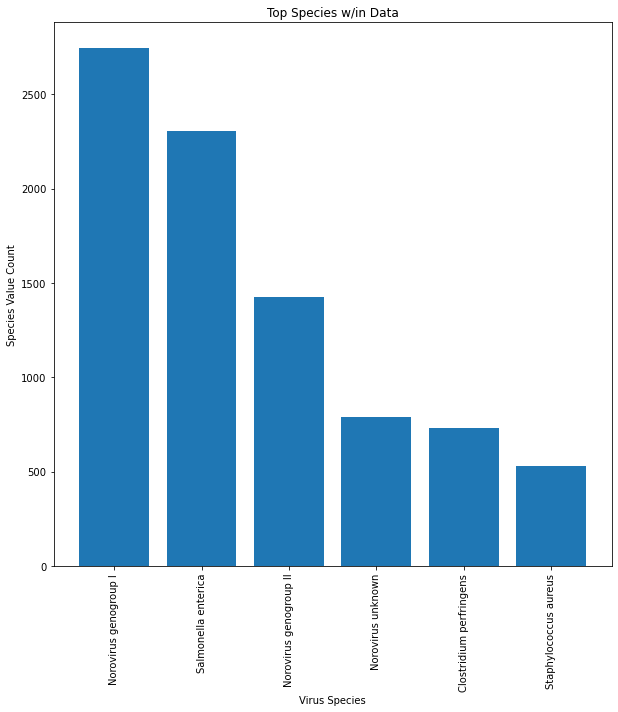

In [34]:
virus_series = virus_df
virus_frame = virus_series.to_frame()
virus_frame = virus_frame.head(20)
plt.figure(figsize=(10, 10))
plt.bar(virus_frame.index, virus_frame["Species"])
plt.title('Top Species w/in Data')
plt.ylabel('Species Value Count')
plt.xlabel('Virus Species')
plt.xticks(rotation='vertical')
plt.savefig("SpeciesOcc.png", bbox_inches="tight")
plt.show()

In [35]:

food_df = outbreaks_df
food_df

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19114,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
19117,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0


In [36]:

food_df['Food'].count()

10156

In [37]:
food_df = food_df[['Food','Species']].dropna()
food_df

,Food,Species
3,"Fish, Ahi",Scombroid toxin
4,"Lasagna, Unspecified; Eggs, Other",Salmonella enterica
7,"Stuffing, Unspecified; Sandwich, Turkey",Salmonella enterica
8,"Salad, Unspecified",Virus
9,"Peppers, Chili",Virus
...,...,...
19105,Meal Replacement Powder,Salmonella enterica
19108,Foie Gras,Campylobacter unknown
19111,"Cookies, Chocolate Chip",Norovirus genogroup II
19113,"Gravy, Pork",Clostridium perfringens


In [38]:

food_df = outbreaks_df.groupby('Food').filter(lambda x : len(x)>100)

food_df['Food'].value_counts()


Multiple Foods            206
Oysters, Raw              165
Ground Beef, Hamburger    127
Salad, Unspecified        118
Chicken, Unspecified      105
Name: Food, dtype: int64

In [39]:
food_df['Species'].value_counts()

Norovirus genogroup I                                                               136
Salmonella enterica                                                                  58
Vibrio parahaemolyticus                                                              54
Escherichia coli, Shiga toxin-producing                                              45
Norovirus genogroup II                                                               36
Norovirus unknown                                                                    27
Staphylococcus aureus                                                                18
Bacillus cereus; Clostridium perfringens                                             12
Virus                                                                                11
Norovirus                                                                            11
Clostridium perfringens                                                              10
Hepatitis A                     

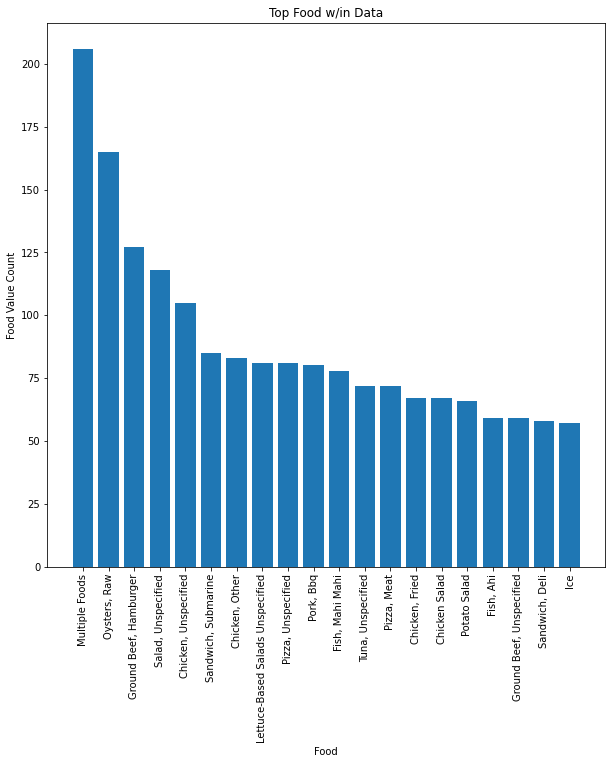

In [40]:

food_series = outbreaks_df['Food'].value_counts()
food_frame = food_series.to_frame()
food_frame = food_frame.head(20)
plt.figure(figsize=(10, 10))
plt.bar(food_frame.index, food_frame["Food"])
plt.title('Top Food w/in Data')
plt.ylabel('Food Value Count')
plt.xlabel('Food')
plt.xticks(rotation='vertical')
plt.savefig('FoodOcc.png', bbox_inches='tight')
plt.show()

# Merari's Part

In [22]:
#Grouping the data by state
states_group = outbreaks_df.groupby('State')

In [23]:
# Number of Hospitalizations per state
hosp_state = states_group['Hospitalizations'].sum();

# Number of deaths per state
death_count = states_group['Fatalities'].sum();

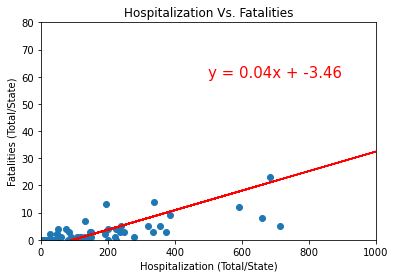

In [24]:
# Investigating correlation between Fatalities and Hospitalizations (Consider Doing Total Hopitalization Vs. Total Fatalities)
plt.scatter(hosp_state , death_count)
plt.title('Hospitalization Vs. Fatalities');
plt.xlabel('Hospitalization (Total/State)')
plt.ylabel('Fatalities (Total/State)')
plt.xlim((0,1000))
plt.ylim((0 , 80))
(m , b , rval , pval , stderr) = st.linregress(hosp_state , death_count);
hosp_death_line = f'y = {round(m , 2)}x + {round(b , 2)}';
plt.annotate(hosp_death_line , (500 , 60) , fontsize = 15 , color = 'red');
regress_val = m * hosp_state + b;
plt.plot(hosp_state , regress_val , color = 'red');



In [25]:
coeff_p  = st.pearsonr(hosp_state , death_count)
print(f'The pearson coefficient for Hospitalization Vs. Fatalities is {round(coeff_p[0] , 2)}')

The pearson coefficient for Hospitalization Vs. Fatalities is 0.97


### Broad Correlation
    It makes sense that as the number of hospitalizations increase we see an increase in fatalities.
    Using one feature to predict fatalities is flawed because:
    * It does not account for severity of hospital admission
    * Does not incorporate the lethality of a specific contaminant (ie: E.coli)

Text(0.5, 1.0, 'Fatalities per State')

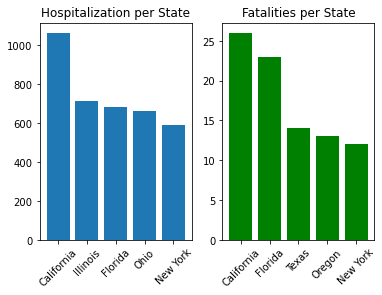

In [26]:
# Narrowing it down to the 5 states with the most 

#6 state values with the most hospitalizations
top_hosp = hosp_state.sort_values(ascending=False).head(6);

#6 state values with the most deaths
top_deaths = death_count.sort_values(ascending=False).head(6);

#Filtering out multistate label for both hospitalization and deaths
top_hosp = top_hosp.drop(labels = 'Multistate')

top_deaths = top_deaths.drop(labels = 'Multistate')


# #Plotting bar charts of 5 states with most Hospitalizatons | Fatalities
fig, (bar1 , bar2) = plt.subplots(1,2)

#Formatting for the first bar chart


bar1.bar(x = top_hosp.index , height = top_hosp)
plt.setp(bar1.get_xticklabels(), rotation=45 )
bar1.set_title('Hospitalization per State')


bar2.bar(x = top_deaths.index , height = top_deaths , color = 'green')
plt.setp(bar2.get_xticklabels(), rotation=45)
bar2.set_title('Fatalities per State')


### Incidences of Outbreaks leading to Hospitalizations and Deaths for the top 5 states

    Hospitalization: Listed are our 

<AxesSubplot:title={'center':'Top 5 Contaminant Species in California'}, ylabel='Fatalities'>

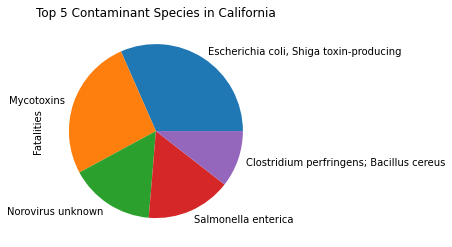

In [27]:
#Drilling down to a view of california outbreaks
cali_df = outbreaks_df[outbreaks_df['State'] == 'California'];

#Computing the 5 most common contaminants and plotting as a pie
cali_df.groupby('Species')['Fatalities'].sum().sort_values(ascending=False).head(5).plot.pie(title = 'Top 5 Contaminant Species in California')